In [2]:
import matplotlib.pyplot as plt
from data.data import load_data
import seaborn as sns
import pandas as pd

# Task 1:
- Analyze dataset structure: distributions, outliers, skewness
- Examine correlations among numerical features
- Explore categorical feature cardinality
- Study churn vs. non-churn population imbalance
- Identify missing values and propose imputation strategies

In [3]:
df = load_data()

/home/lasse/Documents/aml_exam/data/data.py:34: ParserWarning: Both a converter and dtype were specified for column Churn - only the converter will be used.
  data = pd.read_csv(


In [4]:
churned = df[df['Churn'] == 1]
churned.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,1
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,1
5,9305-CDSKC,Female,False,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.5,1
8,7892-POOKP,Female,False,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.05,1
13,0280-XJGEX,Male,False,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.699997,5036.3,1
18,4190-MFLUW,Female,False,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.200001,528.35,1
20,8779-QRDMV,Male,True,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.650002,39.65,1
22,1066-JKSGK,Male,False,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.150000,20.15,1
26,6467-CHFZW,Male,False,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.349998,4749.15,1
27,8665-UTDHZ,Male,False,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.200001,30.2,1


# Convert TotalCharges to numeric again to ensure no issues

In [5]:
_col = 'TotalCharges'

if _col in df.columns:
    print(f"Column '{_col}' found. Current dtype: {df[_col].dtype}")
    total_count = len(df)
    before_na = df[_col].isna().sum()
    # attempt conversion
    converted = pd.to_numeric(df[_col], errors='coerce')
    after_na = converted.isna().sum()
    coerced = after_na - before_na
    non_null_before = total_count - before_na
    non_null_after = total_count - after_na

    print(f"Total rows: {total_count}")
    print(f"Non-null before conversion: {non_null_before}")
    print(f"Non-null after conversion:  {non_null_after}")
    print(f"Values coerced to NaN during conversion: {coerced} ({coerced/total_count*100:.2f}%)")

    if coerced > 0:
        print("\nExamples of values that could not be converted (first 20):")
        failed_examples = df.loc[converted.isna() & df[_col].notna(), _col].head(20)
        print(failed_examples.to_string(index=True))

    # Assign converted series back to the dataframe (in-place change)
    df[_col] = converted

    print(f"\nAfter casting, dtype: {df[_col].dtype}")
    print("\nSummary statistics for the converted column:")
    print(df[_col].describe())
else:
    print(f"Column '{_col}' not found. Available columns: {df.columns.tolist()}")

Column 'TotalCharges' found. Current dtype: object
Total rows: 7043
Non-null before conversion: 7043
Non-null after conversion:  7032
Values coerced to NaN during conversion: 11 (0.16%)

Examples of values that could not be converted (first 20):
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     

After casting, dtype: float64

Summary statistics for the converted column:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# NaNs after conversion

In [7]:
# Display rows with missing data in TotalCharges
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,0
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,0
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,0
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,0
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,0
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,0
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,0
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,0
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,0
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,0


# Numerical features

Dataset Shape: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   string  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int32   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null

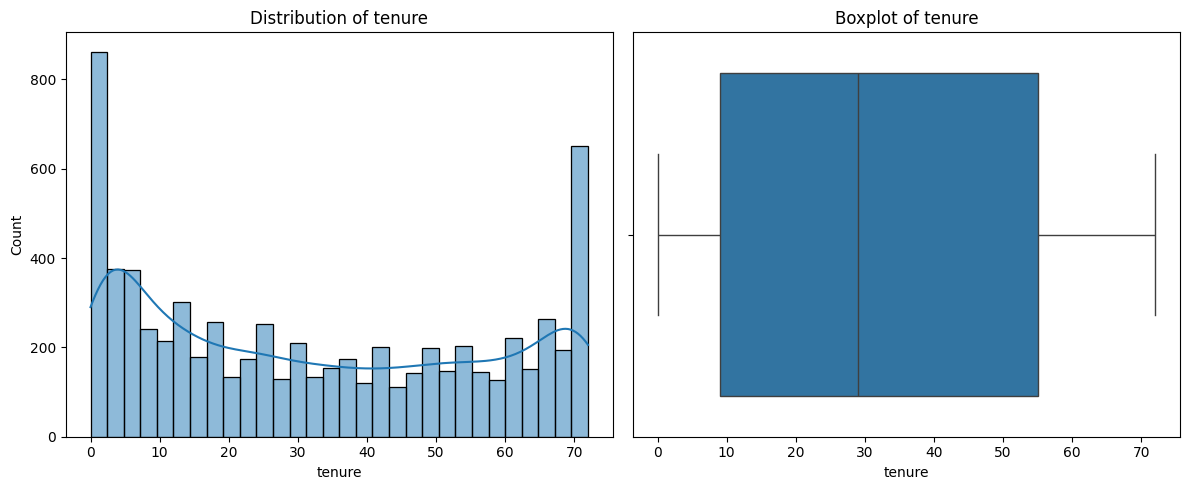

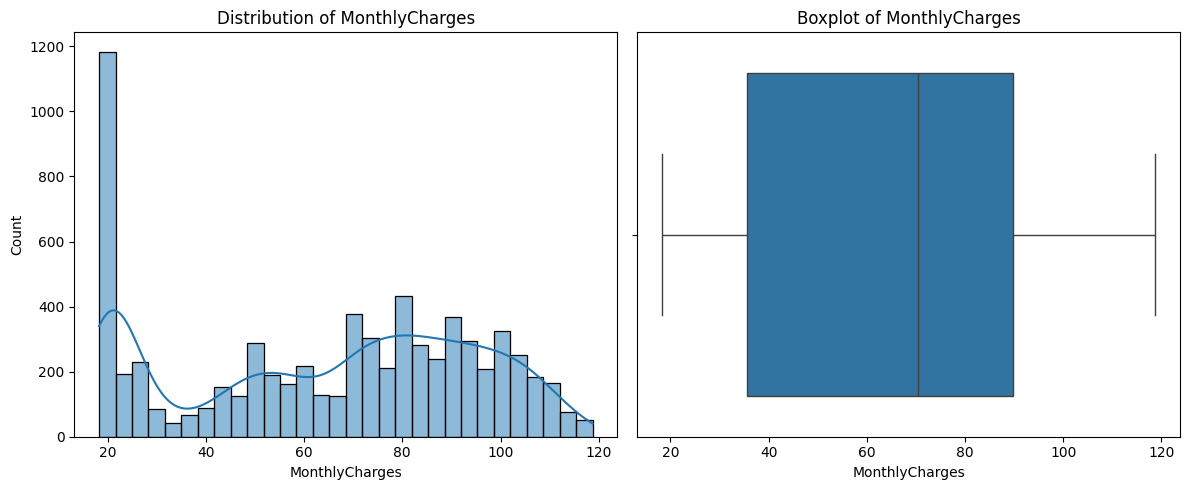

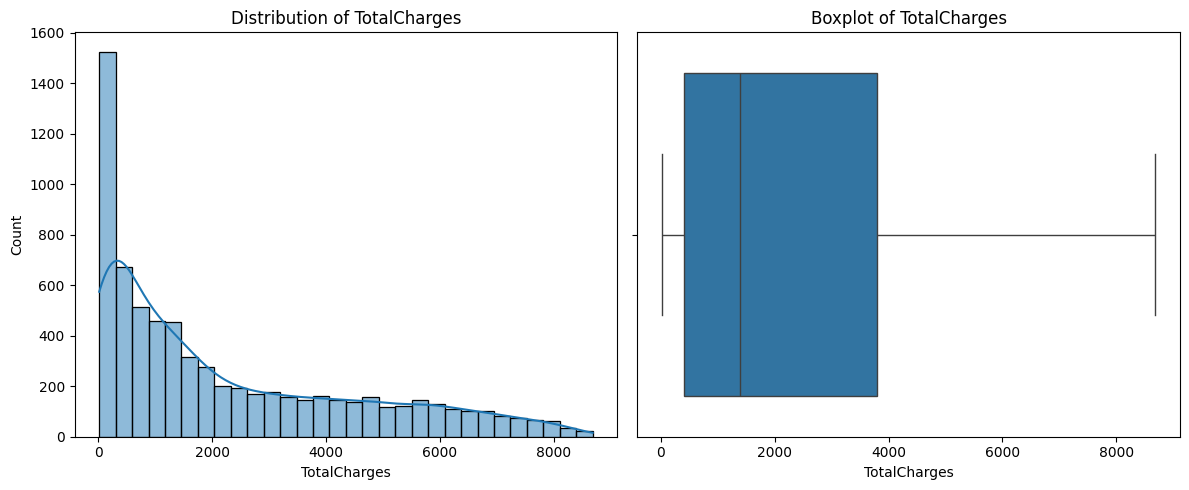

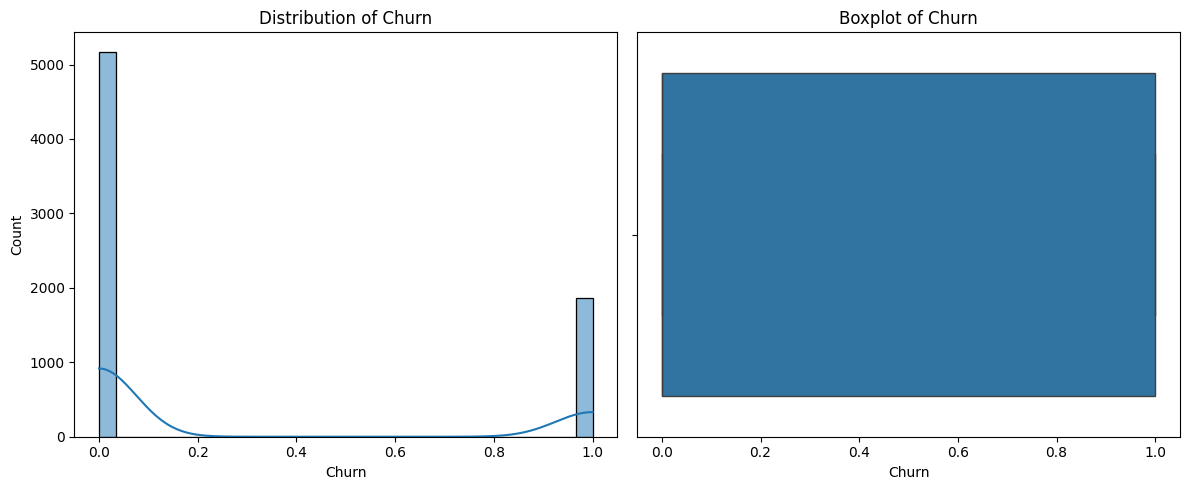

In [9]:
# Analyze dataset structure: distributions, outliers, skewness
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print("Skewness of Numerical Features:")
print("="*50)
numerical_features = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns
skewness = df[numerical_features].skew().sort_values(ascending=False)
print(skewness)

# Visualize distributions and outliers
for num_col in numerical_features:
    plt.figure(figsize=(12, 5))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[num_col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {num_col}')

    # Box plot for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[num_col])
    plt.title(f'Boxplot of {num_col}')

    plt.tight_layout()
    plt.show()

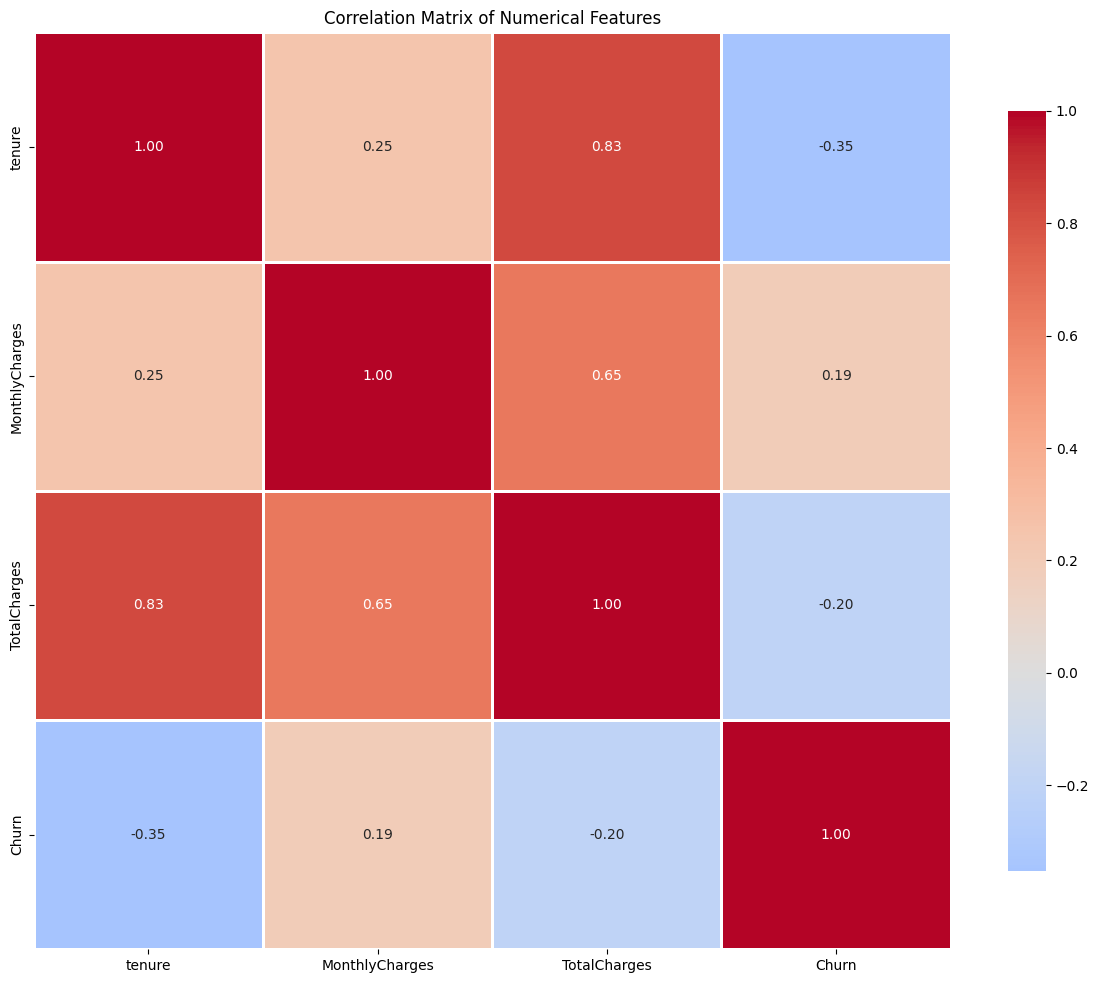

In [10]:
# Calculate correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).corr()

# Visualize correlations using a heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Categorical features

In [11]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("\n" + "="*50)
print("Categorical Features Analysis:")
print("="*50)
for cat_col in categorical_features:
    print(f"\nAnalyzing Categorical Feature: {cat_col}")
    value_counts = df[cat_col].value_counts(dropna=False)
    print(value_counts)


Categorical Features Analysis:

Analyzing Categorical Feature: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Analyzing Categorical Feature: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Analyzing Categorical Feature: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Analyzing Categorical Feature: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Analyzing Categorical Feature: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Analyzing Categorical Feature: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Analyzing Categorical Feature: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Analyzing Categorical Feature: OnlineBackup
OnlineBackup
No             

# Looking at columns in corr with Churn

Churn vs. Non-Churn Population Analysis:

Churn Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Percentage Distribution:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Imbalance Ratio: 2.77:1


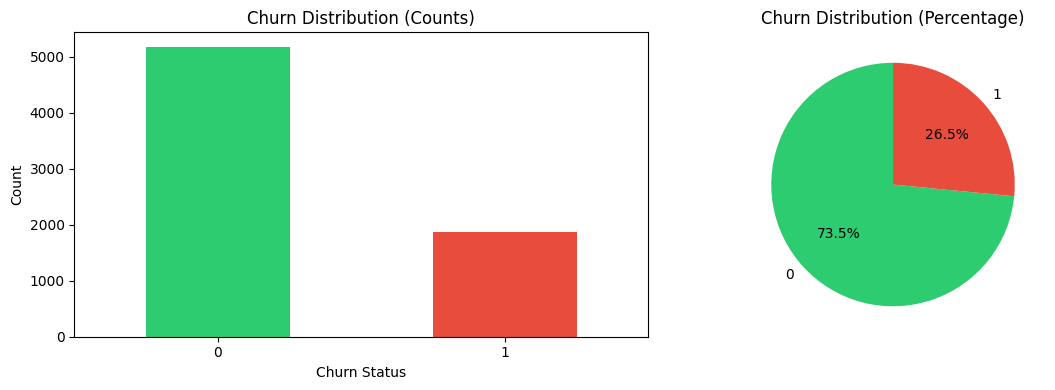

In [12]:
# Study churn vs. non-churn population imbalance
print("="*50)
print("Churn vs. Non-Churn Population Analysis:")
print("="*50)

# Assuming the target variable is named 'Churn' or similar
# Adjust the column name if different
churn_col = 'Churn'  # Update this if your target column has a different name

if churn_col in df.columns:
    churn_counts = df[churn_col].value_counts()
    churn_percentages = df[churn_col].value_counts(normalize=True) * 100

    print(f"\nChurn Distribution:")
    print(churn_counts)
    print(f"\nChurn Percentage Distribution:")
    print(churn_percentages)

    # Calculate imbalance ratio
    imbalance_ratio = churn_counts.max() / churn_counts.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

    # Visualize the imbalance
    fig1, axes1 = plt.subplots(1, 2, figsize=(12, 4))

    # Count plot
    churn_counts.plot(kind='bar', ax=axes1[0], color=['#2ecc71', '#e74c3c'])
    axes1[0].set_title('Churn Distribution (Counts)')
    axes1[0].set_xlabel('Churn Status')
    axes1[0].set_ylabel('Count')
    axes1[0].set_xticklabels(axes1[0].get_xticklabels(), rotation=0)

    # Pie chart
    axes1[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
                colors=['#2ecc71', '#e74c3c'], startangle=90)
    axes1[1].set_title('Churn Distribution (Percentage)')

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{churn_col}' not found. Available columns: {df.columns.tolist()}")

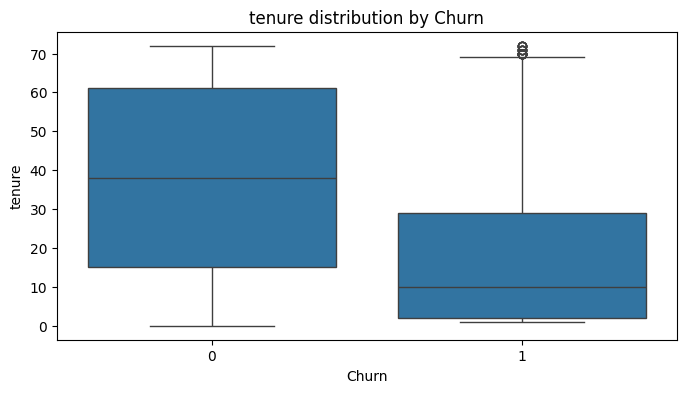

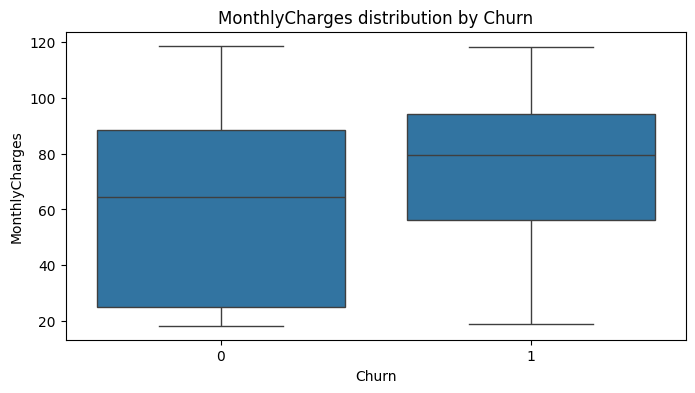

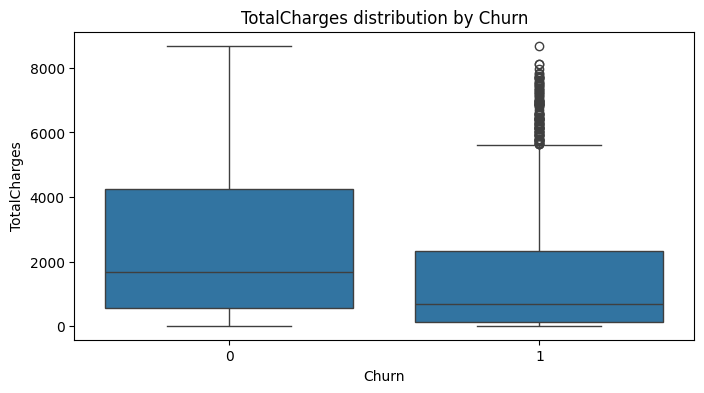

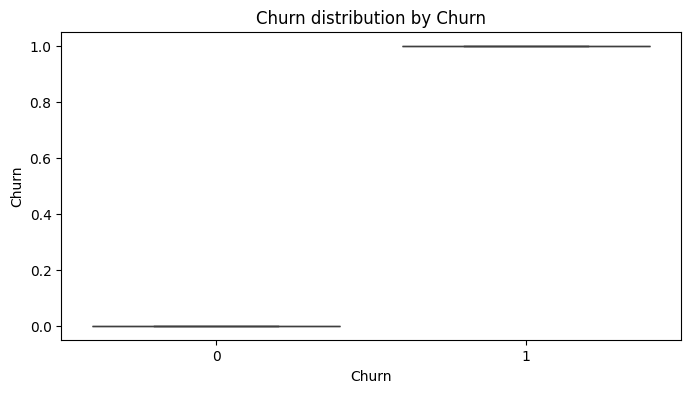

In [13]:
# Visualize Numerical Features vs Churn
for num_churn_col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=churn_col, y=num_churn_col, data=df)
    plt.title(f'{num_churn_col} distribution by {churn_col}')
    plt.show()

### Group "No" (Customers who stayed):

Higher Median: The line inside the box is higher (around 1,500–1,800). This suggests that the "typical" retained customer has paid more over their lifetime.

Wider Range: The box is tall, and the whisker reaches very high (near 9,000). This indicates a mix of new customers (low charges) and very loyal, long-term customers (very high charges).

### Group "Yes" (Customers who churned):

Lower Median: The median line is very low (likely under 1,000). This indicates that most people who churn do so relatively early in their subscription, before they can accumulate high total charges.

Condensed Data: The box is much shorter/squashed. The majority of churned customers have low total charges.

Many Outliers: The circles floating above the "Yes" box show that there are some customers who paid a large amount (6,000–8,000) and still churned, but they are the exception, not the rule.

### Summary Takeaway
The chart suggests that customers with lower Total Charges are more likely to churn.

However, this is likely a correlation with time rather than price sensitivity. Since TotalCharges usually accumulates the longer you stay with a company, this chart implies that churn happens most frequently with newer customers. Once a customer has stayed long enough to rack up high charges, they are statistically less likely to leave.

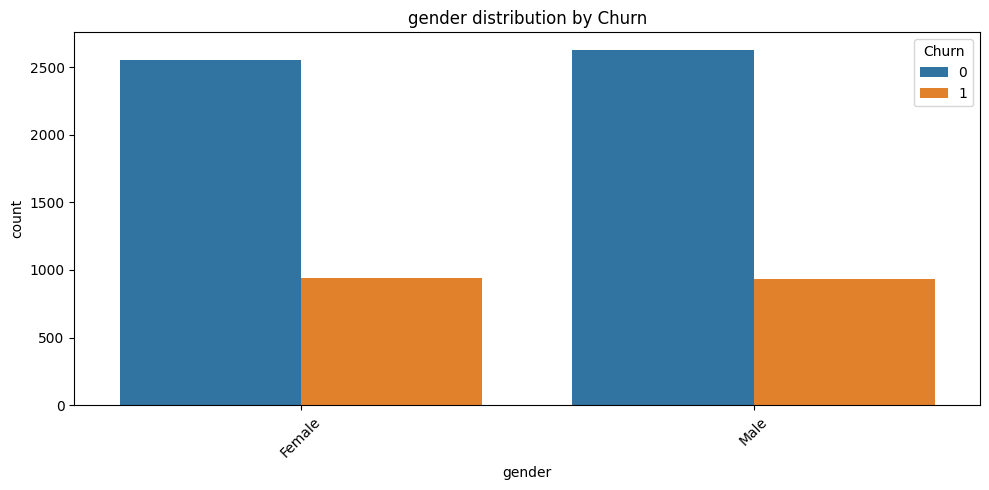

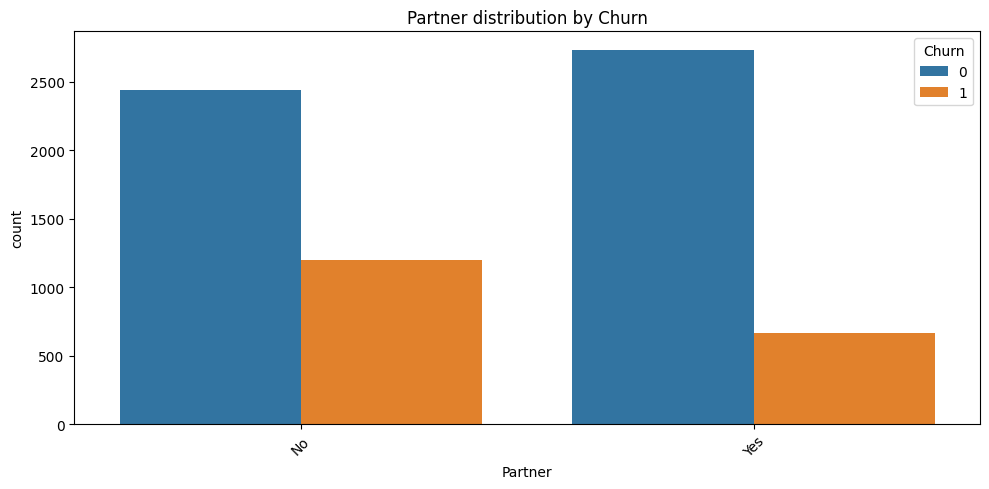

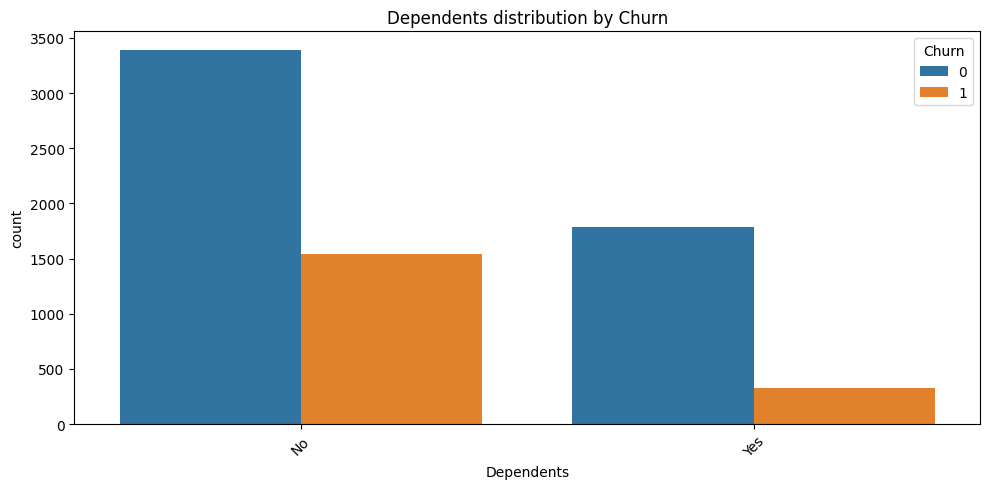

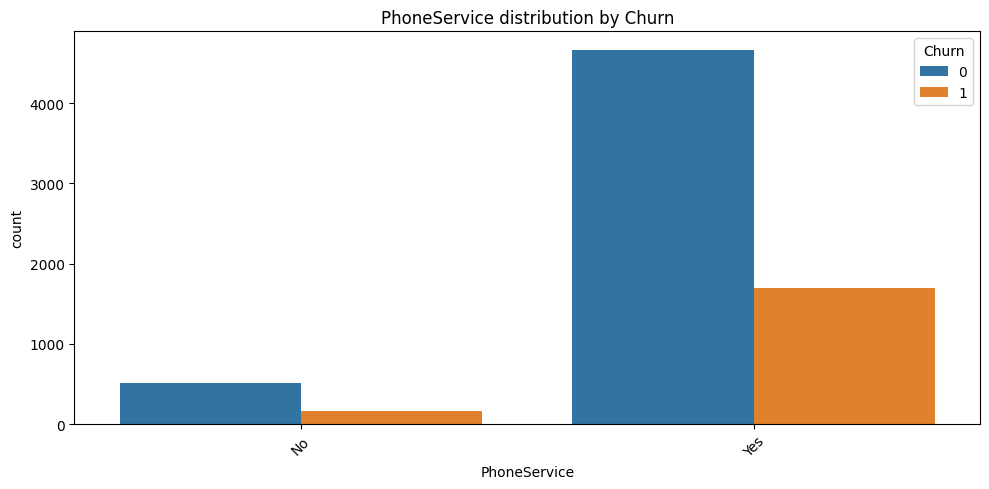

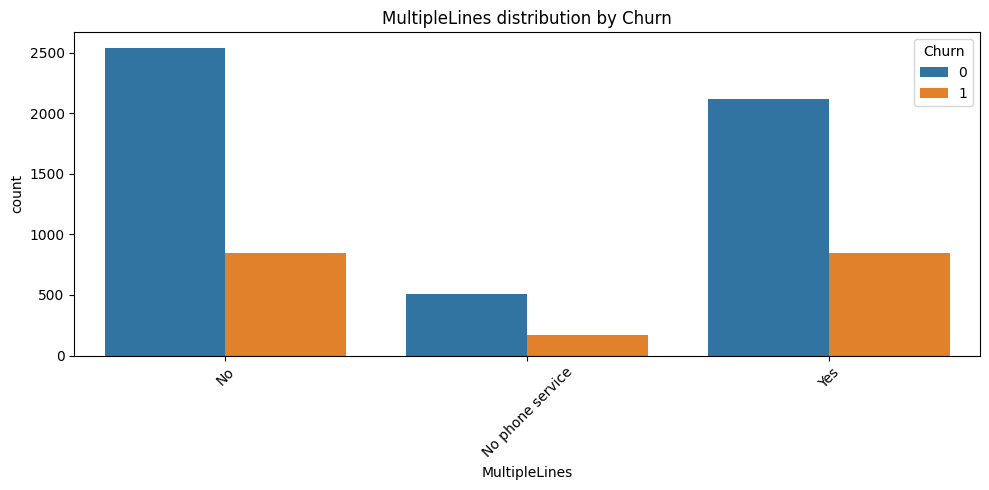

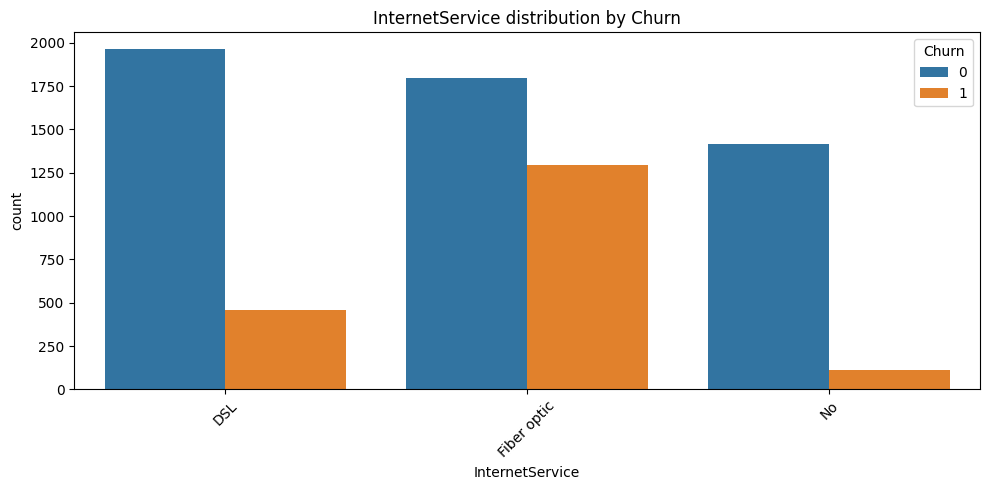

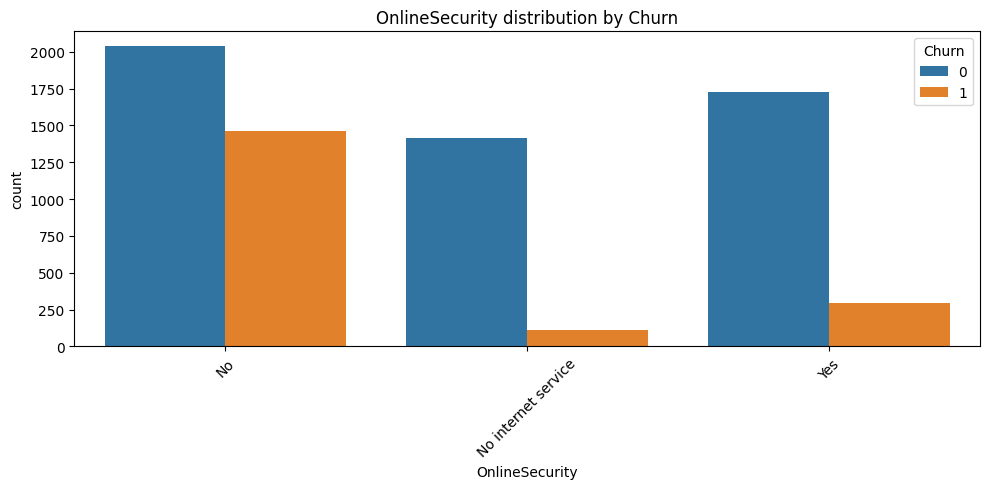

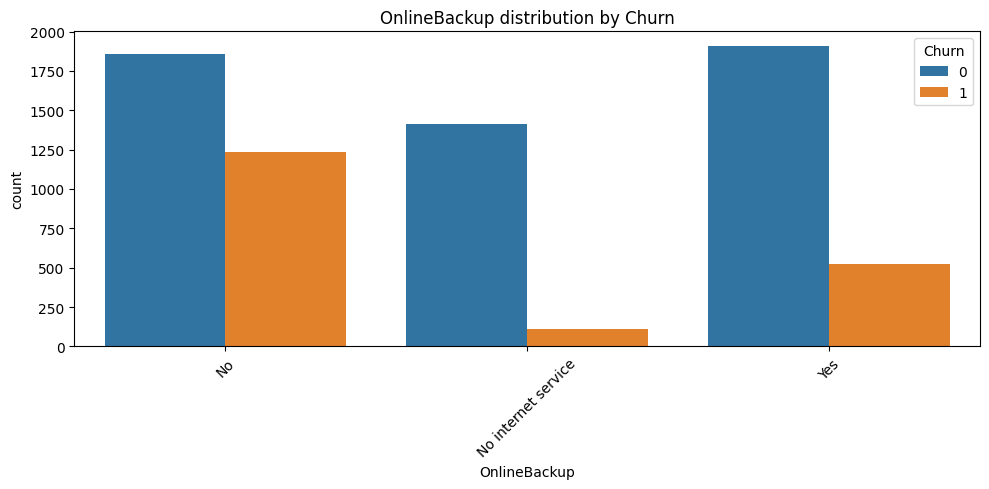

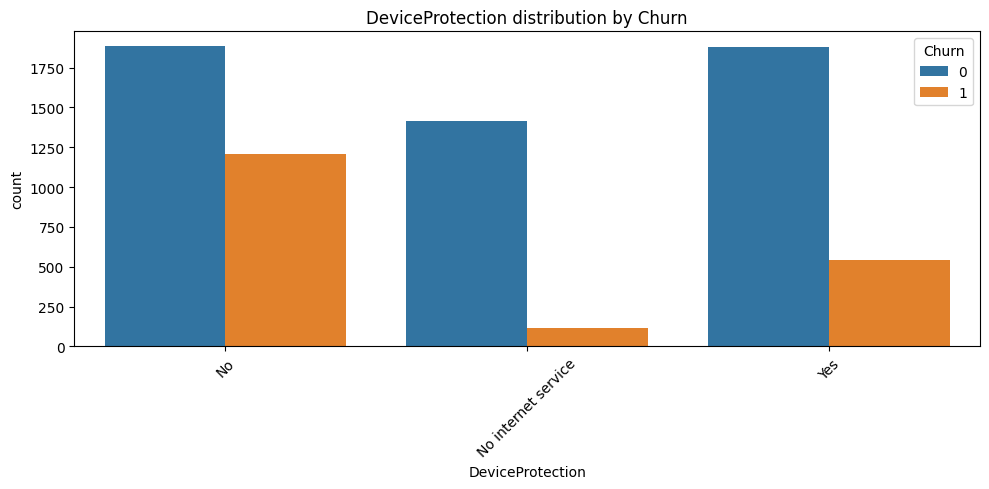

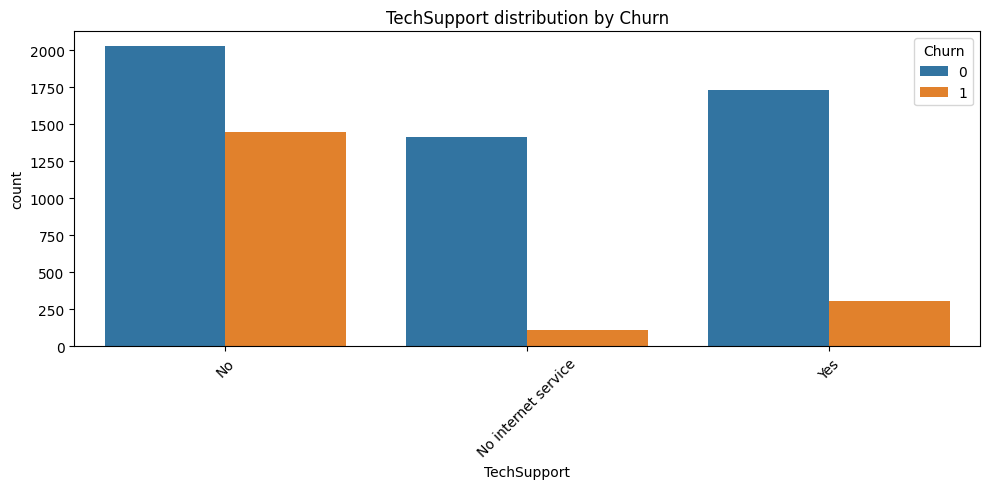

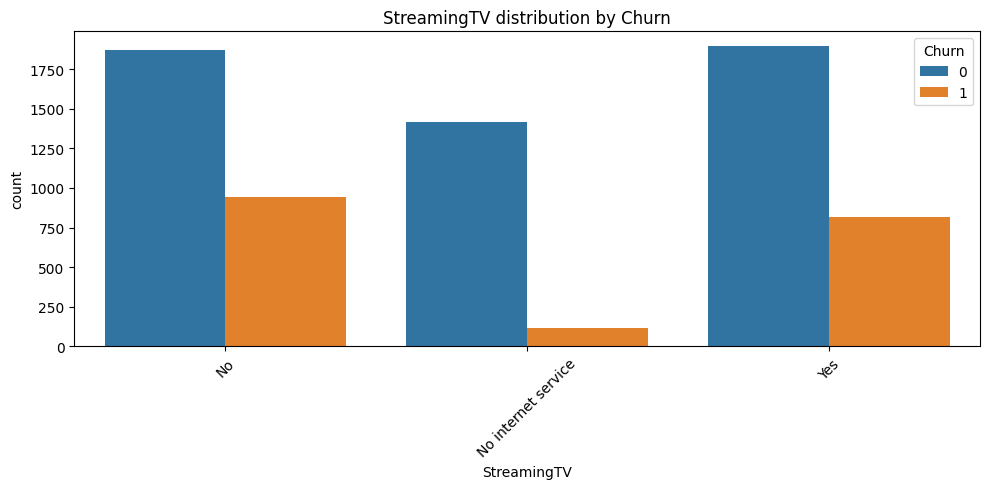

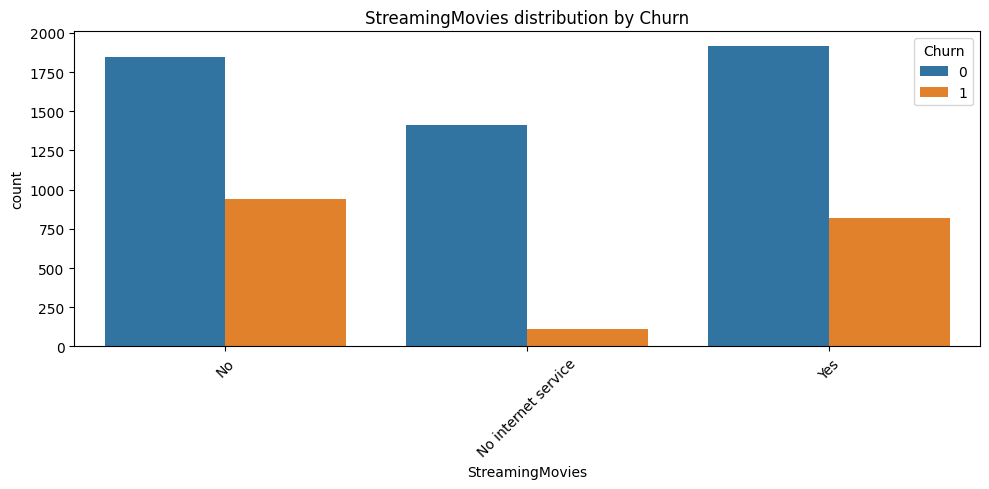

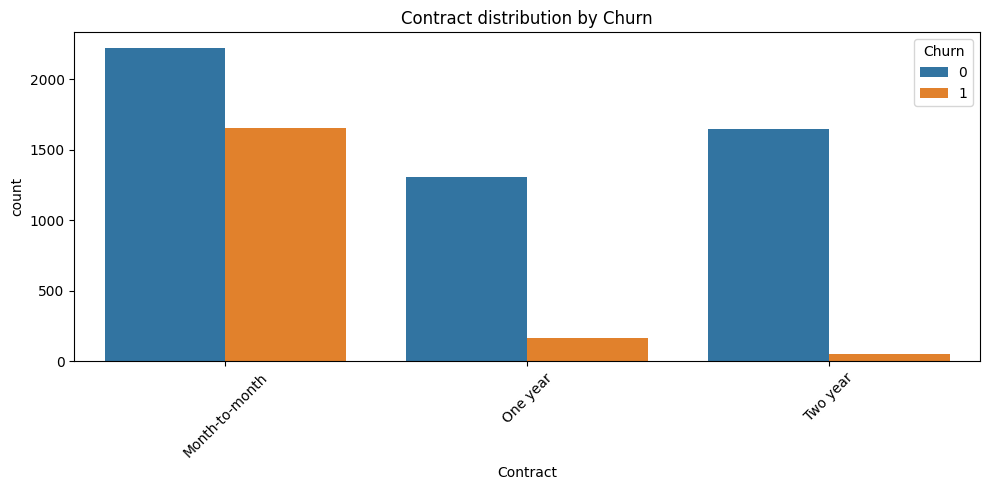

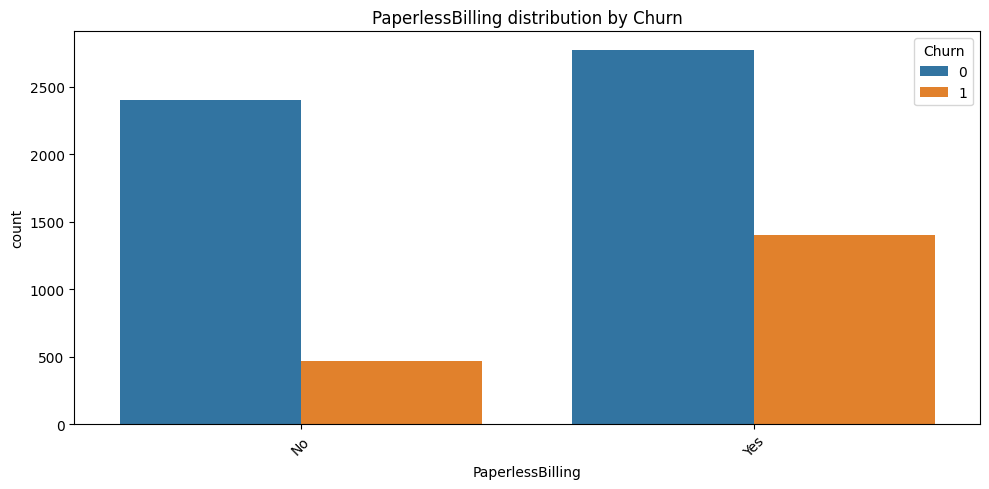

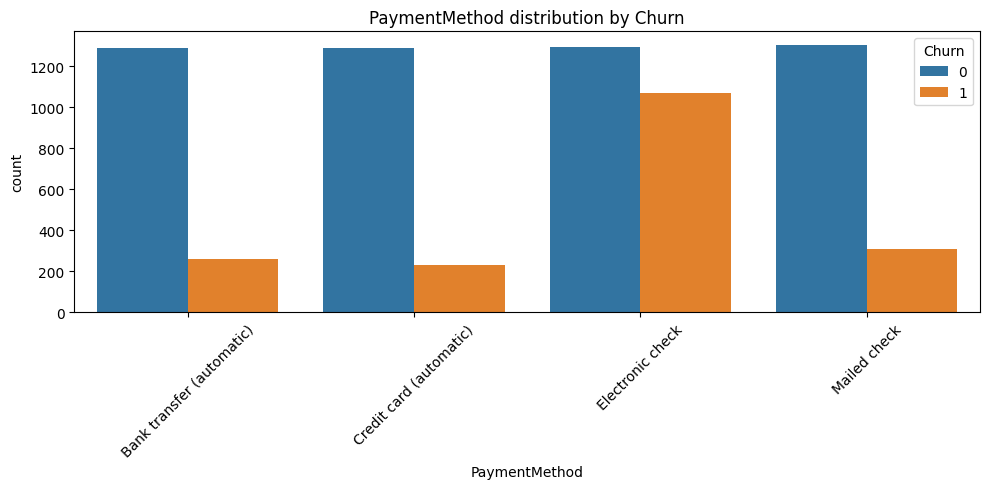

In [15]:
# Visualize Categorical Features vs Churn
for col in categorical_features:
    if col != churn_col:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue=churn_col, data=df)
        plt.title(f'{col} distribution by {churn_col}')
        plt.xticks(rotation=45)
        plt.legend(title=churn_col, loc='upper right')
        plt.tight_layout()
        plt.show()

In [16]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


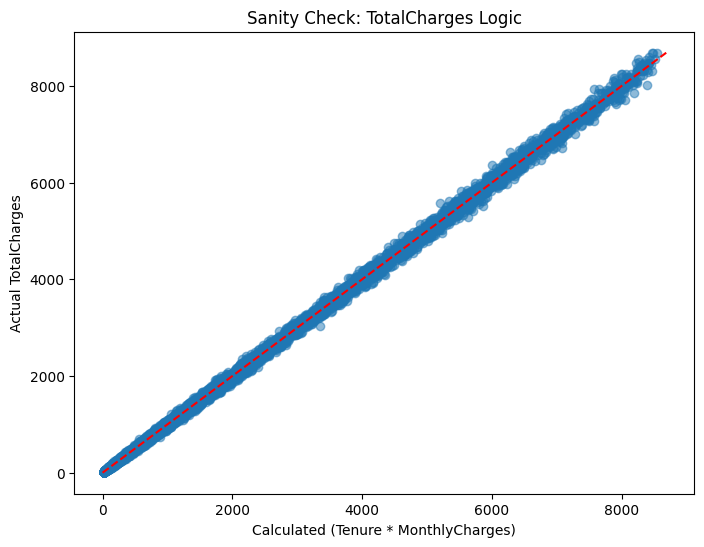

In [17]:
# Sanity Check: TotalCharges vs (Tenure * MonthlyCharges)
# Note: Might not be exact due to price changes over time, but should be linear.
plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'] * df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.xlabel('Calculated (Tenure * MonthlyCharges)')
plt.ylabel('Actual TotalCharges')
plt.title('Sanity Check: TotalCharges Logic')
plt.plot([0, df['TotalCharges'].max()], [0, df['TotalCharges'].max()], 'r--') # Identity line
plt.show()